# Fuel Economy

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
f08 = "fuel_economy_datasets/all_alpha_08.csv"
f18 = "fuel_economy_datasets/all_alpha_18.csv"

In [4]:
data_08 = pd.read_csv(f08)
data_18 = pd.read_csv(f18)

In [5]:
data_08.head(4)

,Model,Displ,Cyl,Trans,Drive,Fuel,Sales Area,Stnd,Underhood ID,Veh Class,Air Pollution Score,FE Calc Appr,City MPG,Hwy MPG,Cmb MPG,Unadj Cmb MPG,Greenhouse Gas Score,SmartWay
0,ACURA MDX,3.7,(6 cyl),Auto-S5,4WD,Gasoline,CA,U2,8HNXT03.7PKR,SUV,7,Drv,15,20,17,22.0527,4,no
1,ACURA MDX,3.7,(6 cyl),Auto-S5,4WD,Gasoline,FA,B5,8HNXT03.7PKR,SUV,6,Drv,15,20,17,22.0527,4,no
2,ACURA RDX,2.3,(4 cyl),Auto-S5,4WD,Gasoline,CA,U2,8HNXT02.3DKR,SUV,7,Drv,17,22,19,24.1745,5,no
3,ACURA RDX,2.3,(4 cyl),Auto-S5,4WD,Gasoline,FA,B5,8HNXT02.3DKR,SUV,6,Drv,17,22,19,24.1745,5,no


In [6]:
data_18.head(4)

,Model,Displ,Cyl,Trans,Drive,Fuel,Cert Region,Stnd,Stnd Description,Underhood ID,Veh Class,Air Pollution Score,City MPG,Hwy MPG,Cmb MPG,Greenhouse Gas Score,SmartWay,Comb CO2
0,ACURA RDX,3.5,6.0,SemiAuto-6,2WD,Gasoline,FA,T3B125,Federal Tier 3 Bin 125,JHNXT03.5GV3,small SUV,3,20,28,23,5,No,386
1,ACURA RDX,3.5,6.0,SemiAuto-6,2WD,Gasoline,CA,U2,California LEV-II ULEV,JHNXT03.5GV3,small SUV,3,20,28,23,5,No,386
2,ACURA RDX,3.5,6.0,SemiAuto-6,4WD,Gasoline,FA,T3B125,Federal Tier 3 Bin 125,JHNXT03.5GV3,small SUV,3,19,27,22,4,No,402
3,ACURA RDX,3.5,6.0,SemiAuto-6,4WD,Gasoline,CA,U2,California LEV-II ULEV,JHNXT03.5GV3,small SUV,3,19,27,22,4,No,402


## Diagnostics

In [7]:
data_08.shape

(2404, 18)

In [8]:
data_18.shape

(1611, 18)

In [9]:
data_08.dtypes

Model                    object
Displ                   float64
Cyl                      object
Trans                    object
Drive                    object
Fuel                     object
Sales Area               object
Stnd                     object
Underhood ID             object
Veh Class                object
Air Pollution Score      object
FE Calc Appr             object
City MPG                 object
Hwy MPG                  object
Cmb MPG                  object
Unadj Cmb MPG           float64
Greenhouse Gas Score     object
SmartWay                 object
dtype: object

In [10]:
data_18.dtypes

Model                    object
Displ                   float64
Cyl                     float64
Trans                    object
Drive                    object
Fuel                     object
Cert Region              object
Stnd                     object
Stnd Description         object
Underhood ID             object
Veh Class                object
Air Pollution Score       int64
City MPG                 object
Hwy MPG                  object
Cmb MPG                  object
Greenhouse Gas Score      int64
SmartWay                 object
Comb CO2                 object
dtype: object

In [11]:
len(data_08[data_08.duplicated() == True])

25

In [12]:
len(data_18[data_18.duplicated() == True])

0

In [13]:
data_08.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2404 entries, 0 to 2403
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Model                 2404 non-null   object 
 1   Displ                 2404 non-null   float64
 2   Cyl                   2205 non-null   object 
 3   Trans                 2205 non-null   object 
 4   Drive                 2311 non-null   object 
 5   Fuel                  2404 non-null   object 
 6   Sales Area            2404 non-null   object 
 7   Stnd                  2404 non-null   object 
 8   Underhood ID          2404 non-null   object 
 9   Veh Class             2404 non-null   object 
 10  Air Pollution Score   2404 non-null   object 
 11  FE Calc Appr          2205 non-null   object 
 12  City MPG              2205 non-null   object 
 13  Hwy MPG               2205 non-null   object 
 14  Cmb MPG               2205 non-null   object 
 15  Unadj Cmb MPG        

In [14]:
data_18.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1611 entries, 0 to 1610
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Model                 1611 non-null   object 
 1   Displ                 1609 non-null   float64
 2   Cyl                   1609 non-null   float64
 3   Trans                 1611 non-null   object 
 4   Drive                 1611 non-null   object 
 5   Fuel                  1611 non-null   object 
 6   Cert Region           1611 non-null   object 
 7   Stnd                  1611 non-null   object 
 8   Stnd Description      1611 non-null   object 
 9   Underhood ID          1611 non-null   object 
 10  Veh Class             1611 non-null   object 
 11  Air Pollution Score   1611 non-null   int64  
 12  City MPG              1611 non-null   object 
 13  Hwy MPG               1611 non-null   object 
 14  Cmb MPG               1611 non-null   object 
 15  Greenhouse Gas Score 

In [15]:
data_08.isna().sum()

Model                     0
Displ                     0
Cyl                     199
Trans                   199
Drive                    93
Fuel                      0
Sales Area                0
Stnd                      0
Underhood ID              0
Veh Class                 0
Air Pollution Score       0
FE Calc Appr            199
City MPG                199
Hwy MPG                 199
Cmb MPG                 199
Unadj Cmb MPG           199
Greenhouse Gas Score    199
SmartWay                  0
dtype: int64

In [16]:
data_08.isnull().values.ravel().sum()

1685

In [17]:
data_18.isna().sum()

Model                   0
Displ                   2
Cyl                     2
Trans                   0
Drive                   0
Fuel                    0
Cert Region             0
Stnd                    0
Stnd Description        0
Underhood ID            0
Veh Class               0
Air Pollution Score     0
City MPG                0
Hwy MPG                 0
Cmb MPG                 0
Greenhouse Gas Score    0
SmartWay                0
Comb CO2                0
dtype: int64

In [18]:
data_18.isnull().values.ravel().sum()

4

In [19]:
data_08.nunique()

Model                   436
Displ                    47
Cyl                       8
Trans                    14
Drive                     2
Fuel                      5
Sales Area                3
Stnd                     12
Underhood ID            343
Veh Class                 9
Air Pollution Score      13
FE Calc Appr              2
City MPG                 39
Hwy MPG                  43
Cmb MPG                  38
Unadj Cmb MPG           721
Greenhouse Gas Score     20
SmartWay                  2
dtype: int64

In [20]:
data_18.nunique()

Model                   367
Displ                    36
Cyl                       7
Trans                    26
Drive                     2
Fuel                      5
Cert Region               2
Stnd                     19
Stnd Description         19
Underhood ID            230
Veh Class                 9
Air Pollution Score       6
City MPG                 58
Hwy MPG                  62
Cmb MPG                  57
Greenhouse Gas Score     10
SmartWay                  3
Comb CO2                299
dtype: int64

In [21]:
data_08["Fuel"].unique()

array(['Gasoline', 'ethanol/gas', 'ethanol', 'diesel', 'CNG'],
      dtype=object)

In [22]:
data_18["Fuel"].unique()

array(['Gasoline', 'Gasoline/Electricity', 'Diesel', 'Ethanol/Gas',
       'Electricity'], dtype=object)

## Cleaning

Dropping non relevant columns

In [23]:
data_08.drop(['Stnd', 'Underhood ID', 'FE Calc Appr', 'Unadj Cmb MPG'],axis=1,inplace=True)
data_18.drop(['Stnd', 'Stnd Description', 'Underhood ID', 'Comb CO2'],axis=1,inplace=True)
data_08.shape

(2404, 14)

Renaming columns for consistency

In [24]:
data_08.rename(columns={"Sales Area": "Cert Region"})

,Model,Displ,Cyl,Trans,Drive,Fuel,Cert Region,Veh Class,Air Pollution Score,City MPG,Hwy MPG,Cmb MPG,Greenhouse Gas Score,SmartWay
0,ACURA MDX,3.7,(6 cyl),Auto-S5,4WD,Gasoline,CA,SUV,7,15,20,17,4,no
1,ACURA MDX,3.7,(6 cyl),Auto-S5,4WD,Gasoline,FA,SUV,6,15,20,17,4,no
2,ACURA RDX,2.3,(4 cyl),Auto-S5,4WD,Gasoline,CA,SUV,7,17,22,19,5,no
3,ACURA RDX,2.3,(4 cyl),Auto-S5,4WD,Gasoline,FA,SUV,6,17,22,19,5,no
4,ACURA RL,3.5,(6 cyl),Auto-S5,4WD,Gasoline,CA,midsize car,7,16,24,19,5,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2399,VOLVO XC 90,3.2,(6 cyl),Auto-S6,4WD,Gasoline,CA,SUV,7,14,20,16,4,no
2400,VOLVO XC 90,4.4,(8 cyl),Auto-S6,4WD,Gasoline,CA,SUV,7,13,19,15,3,no
2401,VOLVO XC 90,3.2,(6 cyl),Auto-S6,2WD,Gasoline,FA,SUV,6,14,20,16,4,no
2402,VOLVO XC 90,3.2,(6 cyl),Auto-S6,4WD,Gasoline,FA,SUV,6,14,20,16,4,no


Lowercasing and replacing spaces with underscore

In [25]:
data_08.columns = data_08.columns.str.replace(' ', '_')
data_18.columns = data_18.columns.str.replace(' ', '_')

In [26]:
data_08.columns = [x.lower() for x in data_08.columns]
data_18.columns = [x.lower() for x in data_08.columns]

In [27]:
data_08.head()

,model,displ,cyl,trans,drive,fuel,sales_area,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
0,ACURA MDX,3.7,(6 cyl),Auto-S5,4WD,Gasoline,CA,SUV,7,15,20,17,4,no
1,ACURA MDX,3.7,(6 cyl),Auto-S5,4WD,Gasoline,FA,SUV,6,15,20,17,4,no
2,ACURA RDX,2.3,(4 cyl),Auto-S5,4WD,Gasoline,CA,SUV,7,17,22,19,5,no
3,ACURA RDX,2.3,(4 cyl),Auto-S5,4WD,Gasoline,FA,SUV,6,17,22,19,5,no
4,ACURA RL,3.5,(6 cyl),Auto-S5,4WD,Gasoline,CA,midsize car,7,16,24,19,5,no


In [28]:
data_18.head()

,model,displ,cyl,trans,drive,fuel,sales_area,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
0,ACURA RDX,3.5,6.0,SemiAuto-6,2WD,Gasoline,FA,small SUV,3,20,28,23,5,No
1,ACURA RDX,3.5,6.0,SemiAuto-6,2WD,Gasoline,CA,small SUV,3,20,28,23,5,No
2,ACURA RDX,3.5,6.0,SemiAuto-6,4WD,Gasoline,FA,small SUV,3,19,27,22,4,No
3,ACURA RDX,3.5,6.0,SemiAuto-6,4WD,Gasoline,CA,small SUV,3,19,27,22,4,No
4,ACURA TLX,2.4,4.0,AMS-8,2WD,Gasoline,CA,small car,3,23,33,27,6,No


Filtering data sets by cars certified by California standards

In [29]:
data_08.query('sales_area == "CA"',inplace=True)
data_18.query('sales_area == "CA"',inplace=True)
data_18.shape

(798, 14)

In [30]:
data_08.drop('sales_area',axis=1,inplace=True)
data_18.drop('sales_area',axis=1,inplace=True)
data_08.shape

(1084, 13)

Dropping nulls

In [31]:
data_08.dropna(inplace=True)
data_18.dropna(inplace=True)
data_08.shape

(1009, 13)

Dropping duplicates

In [32]:
data_08.drop_duplicates(inplace=True)
data_18.drop_duplicates(inplace=True)
data_08.shape

(986, 13)

## Fixing dtypes

### Cyl

`cyl`: Extract int values from the strings in the 2008 cyl column; Convert floats to ints in the 2018 cyl column.

In [33]:
data_08["cyl"] = pd.to_numeric(data_08["cyl"].str.replace(r'.(\d).*', r'\1'))
data_08.head()

/home/natasha/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
0,ACURA MDX,3.7,6,Auto-S5,4WD,Gasoline,SUV,7,15,20,17,4,no
2,ACURA RDX,2.3,4,Auto-S5,4WD,Gasoline,SUV,7,17,22,19,5,no
4,ACURA RL,3.5,6,Auto-S5,4WD,Gasoline,midsize car,7,16,24,19,5,no
6,ACURA TL,3.2,6,Auto-S5,2WD,Gasoline,midsize car,7,18,26,21,6,yes
7,ACURA TL,3.5,6,Auto-S5,2WD,Gasoline,midsize car,7,17,26,20,6,yes


In [34]:
data_08.dtypes

model                    object
displ                   float64
cyl                       int64
trans                    object
drive                    object
fuel                     object
veh_class                object
air_pollution_score      object
city_mpg                 object
hwy_mpg                  object
cmb_mpg                  object
greenhouse_gas_score     object
smartway                 object
dtype: object

In [35]:
data_18["cyl"] = data_18["cyl"].astype(int)
data_18.dtypes

model                    object
displ                   float64
cyl                       int64
trans                    object
drive                    object
fuel                     object
veh_class                object
air_pollution_score       int64
city_mpg                 object
hwy_mpg                  object
cmb_mpg                  object
greenhouse_gas_score      int64
smartway                 object
dtype: object

### Air pollution score

`air_pollution_score`: Converting strings to floats in the 2008 column; Convert ints to floats in the 2018 columns.

When using `pd.to_numeric(data_08["air_pollution_score"]).astype(float)` the following error occurs: `Unable to parse string "6/4"`.

According to the PDF documentation:

*If a vehicle can operate on more than one type of fuel, an estimate is provided for each fuel type.*

All vehicles with more than one fuel type, or hybrids, like the one above (e.g. ethanol AND gas) will have a string that holds two values - one for each.

Fixing 2008 data

In [36]:
double_08 = data_08[data_08["fuel"].str.contains("/")]
double_08

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
1550,MERCEDES-BENZ C300,3.0,6,Auto-L7,2WD,ethanol/gas,small car,6/4,13/18,19/25,15/21,7/6,no


In [37]:
new_08_1 = double_08.copy()
new_08_2 = double_08.copy()

In [38]:
to_split08 = ["fuel","air_pollution_score","city_mpg","hwy_mpg","cmb_mpg","greenhouse_gas_score"]

for col in to_split08:
    new_08_1[col] = new_08_1[col].apply(lambda x: x.split("/")[0])
    new_08_2[col] = new_08_2[col].apply(lambda x: x.split("/")[1])

In [39]:
data_08.drop(double_08.index,inplace=True)
data_08 = pd.concat([data_08,new_08_1,new_08_2])
data_08.reset_index(drop=True,inplace=True)
data_08.shape

(987, 13)

Fixing 2018 data

In [40]:
double_18 = data_18[data_18["fuel"].str.contains("/")]
double_18

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
108,BMW 330e,2.0,4,SemiAuto-8,2WD,Gasoline/Electricity,small car,3,28/66,34/78,30/71,10,Yes
160,BMW 530e,2.0,4,SemiAuto-8,2WD,Gasoline/Electricity,small car,7,27/70,31/75,29/72,10,Elite
162,BMW 530e,2.0,4,SemiAuto-8,4WD,Gasoline/Electricity,small car,7,27/66,31/68,28/67,10,Elite
188,BMW 740e,2.0,4,SemiAuto-8,4WD,Gasoline/Electricity,large car,3,25/62,29/68,27/64,9,Yes
382,CHEVROLET Impala,3.6,6,SemiAuto-6,2WD,Ethanol/Gas,large car,5,14/18,20/28,16/22,4,No
394,CHEVROLET Silverado 15,4.3,6,Auto-6,2WD,Ethanol/Gas,pickup,5,12/18,16/24,14/20,4,No
396,CHEVROLET Silverado 15,4.3,6,Auto-6,4WD,Ethanol/Gas,pickup,5,12/17,15/22,13/19,3,No
398,CHEVROLET Silverado 15,5.3,8,Auto-6,2WD,Ethanol/Gas,pickup,3,12/16,17/23,14/19,3,No
428,CHEVROLET Suburban 1500,5.3,8,Auto-6,2WD,Ethanol/Gas,standard SUV,3,12/16,17/23,14/19,3,No
432,CHEVROLET Suburban 1500,5.3,8,Auto-6,4WD,Ethanol/Gas,standard SUV,3,11/16,15/22,12/18,3,No


In [41]:
new_18_1 = double_18.copy()
new_18_2 = double_18.copy()

In [42]:
to_split18 = ['fuel', 'city_mpg', 'hwy_mpg', 'cmb_mpg']

for col in to_split18:
    new_18_1[col] = new_18_1[col].apply(lambda x: x.split("/")[0])
    new_18_2[col] = new_18_2[col].apply(lambda x: x.split("/")[1])

In [43]:
data_18.drop(double_18.index,inplace=True)
data_18 = pd.concat([data_18,new_18_1,new_18_2])
data_18.reset_index(drop=True,inplace=True)
data_18.shape

(832, 13)

Fixing `air_pollution_score` values:

In [44]:
to_float = ['air_pollution_score','city_mpg', 'hwy_mpg', 'cmb_mpg']

for col in to_float:
    data_08[col] = pd.to_numeric(data_08[col]).astype(float)
    data_18[col] = pd.to_numeric(data_18[col]).astype(float)

In [45]:
data_08.dtypes

model                    object
displ                   float64
cyl                       int64
trans                    object
drive                    object
fuel                     object
veh_class                object
air_pollution_score     float64
city_mpg                float64
hwy_mpg                 float64
cmb_mpg                 float64
greenhouse_gas_score     object
smartway                 object
dtype: object

In [46]:
data_18.dtypes

model                    object
displ                   float64
cyl                       int64
trans                    object
drive                    object
fuel                     object
veh_class                object
air_pollution_score     float64
city_mpg                float64
hwy_mpg                 float64
cmb_mpg                 float64
greenhouse_gas_score      int64
smartway                 object
dtype: object

### Greenhouse gas score

`greenhouse_gas_score`: convert string to integers in 2008 data set

In [47]:
data_08["greenhouse_gas_score"] = data_08["greenhouse_gas_score"].astype(int)
data_18["greenhouse_gas_score"] = data_18["greenhouse_gas_score"].astype(int)

In [48]:
data_08.dtypes

model                    object
displ                   float64
cyl                       int64
trans                    object
drive                    object
fuel                     object
veh_class                object
air_pollution_score     float64
city_mpg                float64
hwy_mpg                 float64
cmb_mpg                 float64
greenhouse_gas_score      int64
smartway                 object
dtype: object

In [49]:
data_18.dtypes

model                    object
displ                   float64
cyl                       int64
trans                    object
drive                    object
fuel                     object
veh_class                object
air_pollution_score     float64
city_mpg                float64
hwy_mpg                 float64
cmb_mpg                 float64
greenhouse_gas_score      int64
smartway                 object
dtype: object

## Exploring data with visuals

Distributions of greenhouse gas score in 2008 and 2018: distribution in 2008 is more skewed to the left

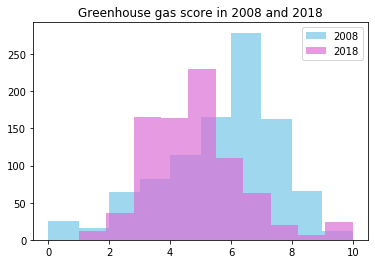

In [75]:
plt.hist(data=data_08, x="greenhouse_gas_score", color="skyblue", label="2008", alpha=.8)
plt.hist(data=data_18, x="greenhouse_gas_score", color="orchid", label="2018", alpha=.7)

plt.legend()
plt.title("Greenhouse gas score in 2008 and 2018");

Distribution of combined mpg: became more skewed to the right

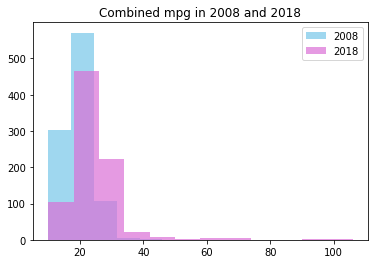

In [76]:
plt.hist(data=data_08, x="cmb_mpg", color="skyblue", label="2008", bins=5,alpha=.8)
plt.hist(data=data_18, x="cmb_mpg", color="orchid", label="2018", bins=12,alpha=.7)

plt.legend()
plt.title("Combined mpg in 2008 and 2018");

The correlation between displacement and combined mpg is negative

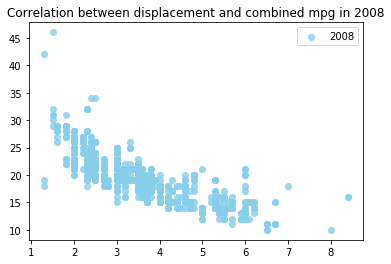

In [78]:
plt.scatter(data=data_08, x="displ", y="cmb_mpg", color="skyblue",label="2008",alpha=.8)
plt.legend()
plt.title("Correlation between displacement and combined mpg in 2008");

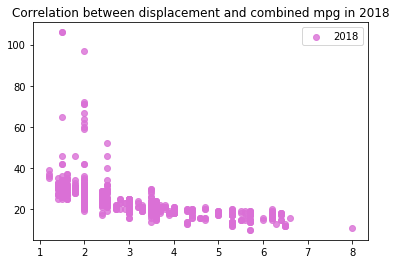

In [53]:
plt.scatter(data=data_18, x="displ", y="cmb_mpg", color="orchid",label="2018",alpha=.8)
plt.legend()
plt.title("Correlation between displacement and combined mpg in 2018");

The correlation between greenhouse gas score and combined mpg is positive

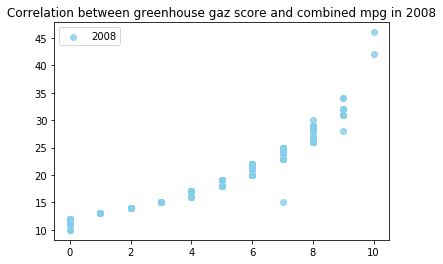

In [54]:
plt.scatter(data=data_08, x="greenhouse_gas_score", y="cmb_mpg", color="skyblue",alpha=.8,label="2008")
plt.legend()
plt.title("Correlation between greenhouse gaz score and combined mpg in 2008");

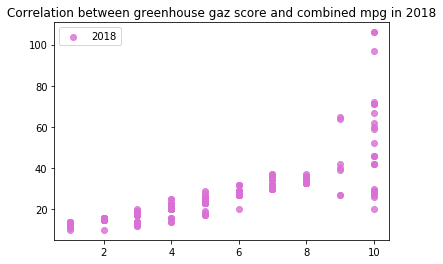

In [79]:
plt.scatter(data=data_18, x="greenhouse_gas_score", y="cmb_mpg", color="orchid",alpha=.8,label="2018")
plt.legend()
plt.title("Correlation between greenhouse gaz score and combined mpg in 2018");

### Are more unique models using alternative fuels in 2018 compared to 2008? By how much?

Alternative sources of fuel in 2008 are CNG and ethanol

In [80]:
data_08["fuel"].value_counts()

Gasoline    984
CNG           1
ethanol       1
gas           1
Name: fuel, dtype: int64

Alternative sources of fuel in 2018 are ethanol and electricity

In [81]:
data_18["fuel"].value_counts()

Gasoline       749
Ethanol         26
Gas             26
Diesel          19
Electricity     12
Name: fuel, dtype: int64

In [82]:
altern_08 = ["CNG","ethanol"]
altern_18 = ["Electricity","Ethanol"]

In [83]:
len(data_08.loc[data_08['fuel'].isin(altern_08)])

2

In [84]:
len(data_18.loc[data_18['fuel'].isin(altern_18)])

38

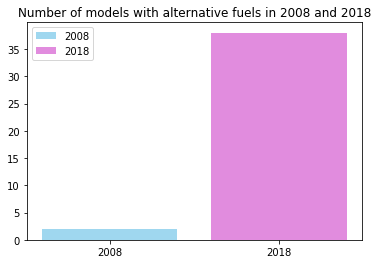

In [86]:
plt.bar(1,len(data_08.loc[data_08['fuel'].isin(altern_08)]),color="skyblue",label="2008",alpha=.8)
plt.bar(2,len(data_18.loc[data_18['fuel'].isin(altern_18)]),color="orchid",label="2018",alpha=.8)
plt.xticks([1,2],["2008","2018"])
plt.legend()
plt.title("Number of models with alternative fuels in 2008 and 2018");

### How much have vehicle classes improved in fuel economy (increased in mpg)?

In [62]:
data_08.groupby("veh_class")["cmb_mpg"].mean()

veh_class
SUV              18.471429
large car        18.509091
midsize car      21.601449
minivan          19.117647
pickup           16.277108
small car        21.105105
station wagon    22.366667
van              14.952381
Name: cmb_mpg, dtype: float64

In [63]:
data_18.groupby("veh_class")["cmb_mpg"].mean()

veh_class
large car          23.409091
midsize car        27.884058
minivan            20.800000
pickup             18.589744
small SUV          24.074074
small car          25.421053
special purpose    18.500000
standard SUV       18.197674
station wagon      27.529412
Name: cmb_mpg, dtype: float64

Somme vehicle classes are absent in both data sets, it won't be possible to assess any improvement

In [64]:
mpg = pd.concat([data_08.groupby("veh_class")["cmb_mpg"].mean(), 
                 data_18.groupby("veh_class")["cmb_mpg"].mean()], axis=1,join="inner")

mpg.columns=["2008","2018"]

mpg

,2008,2018
veh_class,,
large car,18.509091,23.409091
midsize car,21.601449,27.884058
minivan,19.117647,20.800000
pickup,16.277108,18.589744
small car,21.105105,25.421053
station wagon,22.366667,27.529412


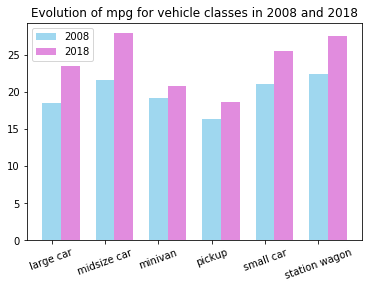

In [87]:
ind = np.arange(len(mpg))
width=.35

plt.bar(ind, mpg["2008"], width, color="skyblue",label="2008",alpha=.8)
plt.bar(ind+width, mpg["2018"], width, color="orchid",label="2018",alpha=.8)
plt.xticks(ind,mpg.index,rotation=20)
plt.legend()
plt.title("Evolution of mpg for vehicle classes in 2008 and 2018");

### What are the characteristics of SmartWay vehicles? Have they changed over time? (mpg, greenhouse gas)

In [90]:
data_08[data_08["smartway"] == "yes"].describe()

,displ,cyl,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score
count,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000
mean,2.602895,4.826316,7.365789,20.984211,28.413158,23.736842,6.868421
std,0.623436,1.002025,1.148195,3.442672,3.075194,3.060379,0.827338
min,1.300000,4.000000,6.000000,17.000000,22.000000,20.000000,6.000000
25%,2.275000,4.000000,7.000000,19.000000,26.000000,22.000000,6.000000
50%,2.400000,4.000000,7.000000,20.000000,28.000000,23.000000,7.000000
75%,3.000000,6.000000,7.000000,22.000000,30.000000,25.000000,7.000000
max,5.000000,8.000000,9.500000,48.000000,45.000000,46.000000,10.000000


In [106]:
data_18.query('smartway in ["Yes", "Elite"]')["cmb_mpg"]

15     31.0
120    30.0
168    32.0
169    33.0
170    37.0
       ... 
812    97.0
826    65.0
829    71.0
830    59.0
831    62.0
Name: cmb_mpg, Length: 108, dtype: float64

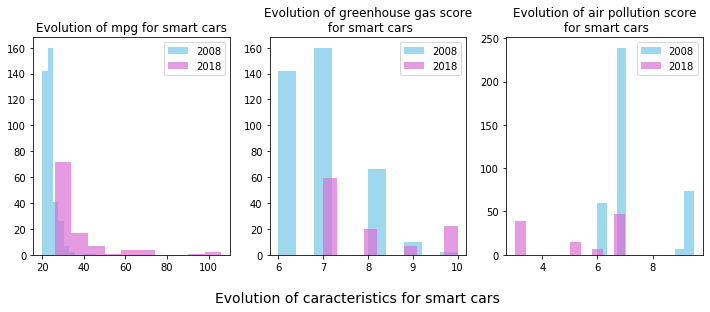

In [123]:
plt.figure(figsize=(12,4))

plt.subplot(1,3,1)
plt.hist(data_08[data_08["smartway"] == "yes"]["cmb_mpg"], color="skyblue", label="2008", alpha=.8)
plt.hist(data_18.query('smartway in ["Yes", "Elite"]')["cmb_mpg"], color="orchid", label="2018", alpha=.7)
plt.legend()
plt.title("Evolution of mpg for smart cars")

plt.subplot(1,3,2)
plt.hist(data_08[data_08["smartway"] == "yes"]["greenhouse_gas_score"], color="skyblue", label="2008", alpha=.8)
plt.hist(data_18.query('smartway in ["Yes", "Elite"]')["greenhouse_gas_score"], color="orchid", label="2018", alpha=.7)
plt.legend()
plt.title("Evolution of greenhouse gas score\n for smart cars")

plt.subplot(1,3,3)
plt.hist(data_08[data_08["smartway"] == "yes"]["air_pollution_score"], color="skyblue", label="2008", alpha=.8)
plt.hist(data_18.query('smartway in ["Yes", "Elite"]')["air_pollution_score"], color="orchid", label="2018", alpha=.7)
plt.legend()
plt.title("Evolution of air pollution score\n for smart cars")

plt.suptitle("Evolution of caracteristics for smart cars",size=14,y=0);

### What features are associated with better fuel economy (mpg)? 

### For all of the models that were produced in 2008 that are still being produced in 2018, how much has the mpg improved and which vehicle improved the most?